# Real Time Streaming Protocol(RTSP)

## Overview 

The RTSP is a network control protocol designed for use in entertainment and communications systems to establish and control streaming media servers. 


The transmission of streaming data itself is not a task of RTSP. <br/>
Most RTSP servers use the RTP in conjunction with RTCP for media stream delivery.


RTSP: setup and control session(port:554/8554);<br/>
RTP:  transport streaming media data;<br/>
RTCP: control traffic statistics with RTP;<br/>


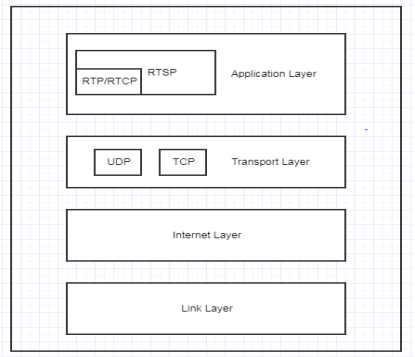

## Format

1.Request Message<br/>
 	方法 URI RTSP版本 CR LF<br/>
    消息头 CR LF CR LF<br/>
    消息体 CR LF<br/>
  方法：OPTIONS,SETUP,PLAY,PAUSE,TEARDOWN<br/>
2.Response Message<br/>
 	RTSP版本 状态码 解释 CR LF<br/>
    消息头 CR LF CR LF<br/>
    消息体 CR LF<br/>
状态码：<br/>
1XX：Reserved；<br/>
2XX：Success，(Operation was received,understand,accepted);<br/>
3XX：Redirect，(Further operations are required to complete the operation)；<br/>
4XX：Client Error，(Request has a syntax error or is not implemented)；<br/>
5XX：Server Error，(The server is unable to implement a legitimate request).<br/>


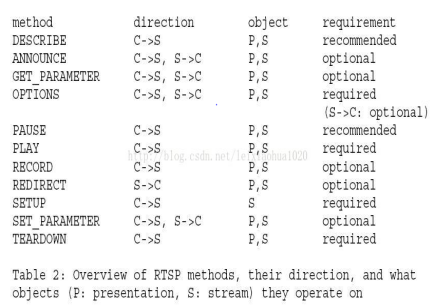

## Flow

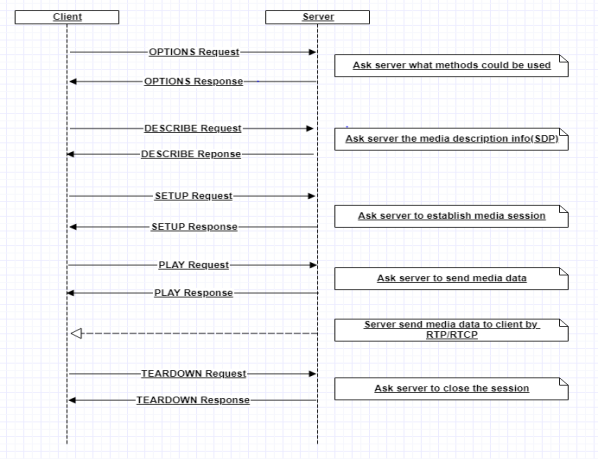

**OPTIONS**

An OPTIONS request returns the request types the server will accept. This request is usually the first message.

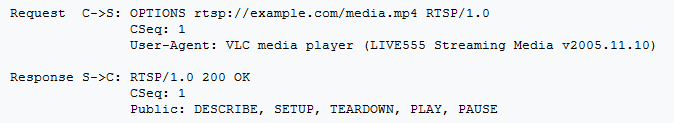

**DESCRIBE**

A DESCRIBE request includes an RTSP URL (rtsp://...), and the type of reply data that can be handled. This reply includes the presentation description, typically in Session Description Protocol (SDP) format. In the typical case, there is one media stream each for audio and video.


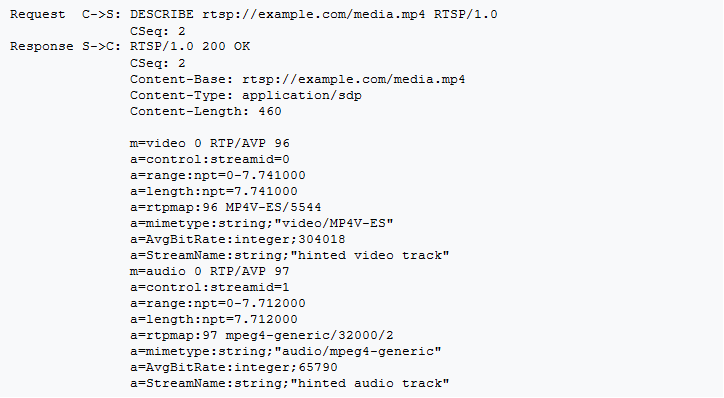

**SETUP**

A SETUP request specifies how a single media stream must be transported. <br/>
This must be done before a PLAY request is sent. <br/>
The request contains the media stream URL and a transport specifier. This specifier typically includes a local port for receiving RTP data (audio or video), and another for RTCP data (meta information). <br/>
The server reply usually confirms the chosen parameters, and fills in the missing parts, such as the server's chosen ports. <br/>
Each media stream must be configured using SETUP before an aggregate play request may be sent.<br/>

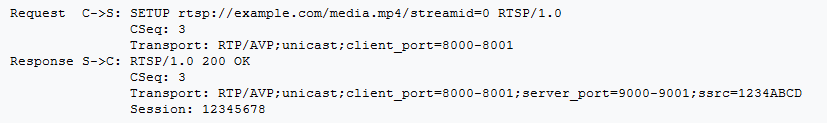

**PLAY**

A PLAY request will cause one or all media streams to be played. <br/>
Play requests can be stacked by sending multiple PLAY requests.<br/> 
The URL may be the aggregate URL (to play all media streams), or a single media stream URL (to play only that stream). <br/>
A range can be specified. If no range is specified, the stream is played from the beginning and plays to the end, or, if the stream is paused, it is resumed at the point it was paused. <br/>


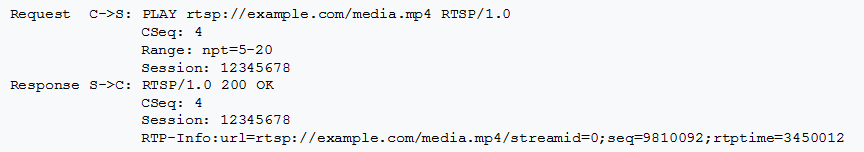

**PAUSE**

A PAUSE request temporarily halts one or all media streams, so it can later be resumed with a PLAY request. <br/>
The request contains an aggregate or media stream URL. <br/>
A range parameter on a PAUSE request specifies when to pause. <br/>
When the range parameter is omitted, the pause occurs immediately and indefinitely.<br/>


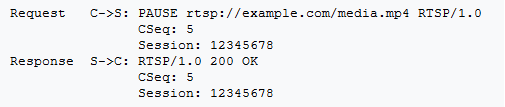

**TAERDOWN**

A TEARDOWN request is used to terminate the session. It stops all media streams and frees all session related data on the server.

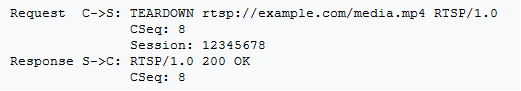

# Live555

## Overview 

http://www.live555.com/

This code forms a set of C++ libraries for multimedia streaming, using open standard protocols (RTP/RTCP, RTSP, SIP). These libraries - which can be compiled for Unix (including Linux and Mac OS X), Windows, and QNX (and other POSIX-compliant systems) - can be used to build streaming applications. <br/>
The libraries can also be used to stream, receive, and process MPEG, H.265, H.264, H.263+, DV or JPEG video, and several audio codecs. They can easily be extended to support additional (audio and/or video) codecs, and can also be used to build basic RTSP clients and servers.


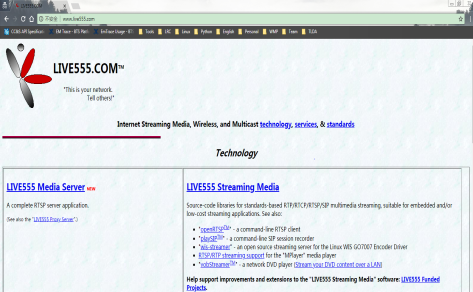

## Build 

Source Code: http://www.live555.com/liveMedia/public/

The source code package as a ".tar.gz" file. 

1. Download and extract the package; 
2. Then cd to the "live" directory. Run: 
    ./genMakefiles <os-platform>
    where <os-platform> is your target platform - e.g., "linux" or "solaris" - defined by a "config.<os-platform>" file. 
    This will generate a Makefile in the "live" directory and each subdirectory. 
3. Then run "make".


## mediaServer 

The "LIVE555 Media Server" is a complete RTSP server application. It can stream several kinds of media file.

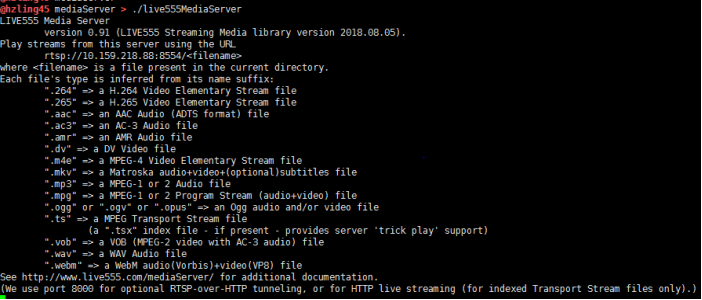

VLC Media Player:“媒体”->”打开网络串流”->“请输入网络URL”<br/>
rtsp://10.159.218.88:8554/ts/test.ts<br/>
rtsp://10.159.218.88:8554/264/test.264<br/>
rtsp://10.159.218.88:8554/wav/test.wav<br/>
rtsp://10.159.218.88:8554/m4e/test.m4e<br/>
rtsp://10.159.218.88:8554/265/test.265<br/>
rtsp://10.159.218.88:8554/aac/test.aac<br/>


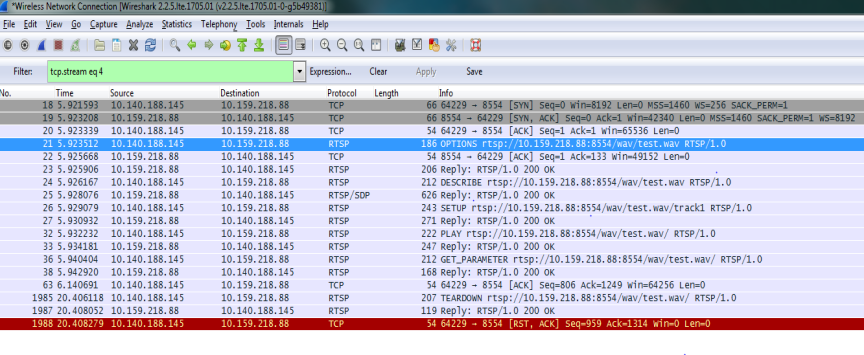

## proxyServer 

The "LIVE555 Proxy Server" is a unicast RTSP server that acts as a 'proxy' for one or more 'back-end’ RTSP/RTP streams.<br/>
For example, for streaming from a RTSP-enabled video camera (which might not be able to handle more than one connection at a time).


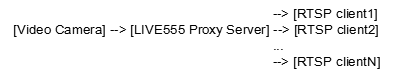

The "LIVE555 Proxy Server" is a command-line application. <br/>

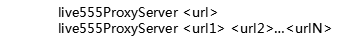

Video Camera RTSP Server:<br/>
1.打开VLC->”媒体”->”流”<br/>

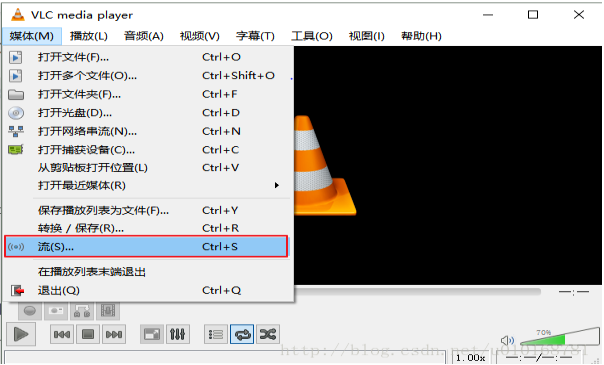

2.”捕获设备”->”DirectShow”->”串流”

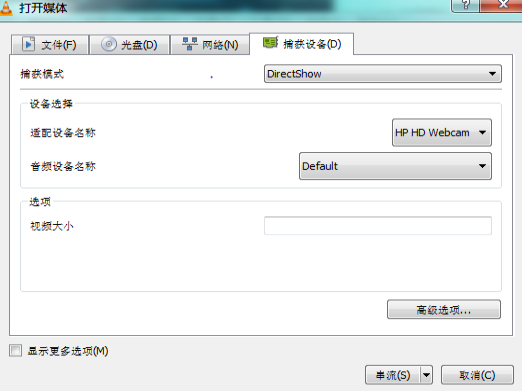

3.”Next”->选择”RTSP”->”添加”(注意不是Next)

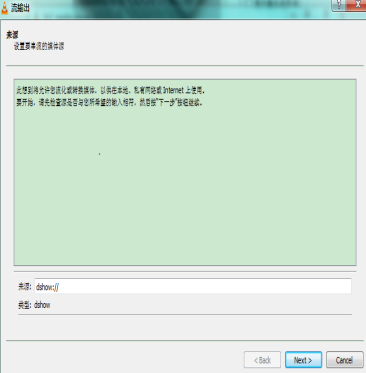

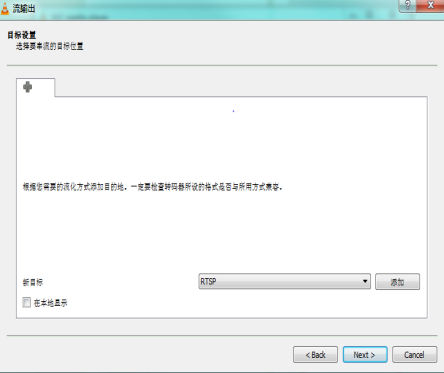

4.端口号默认即可，填写路径；选择激活转码，”Next”

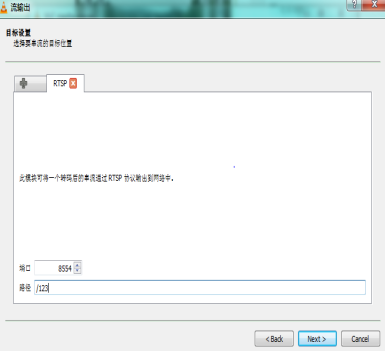

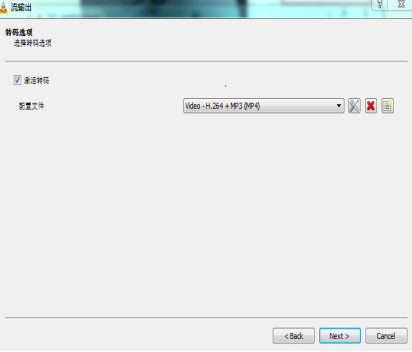

5.这里会显示端口号和路径，点击”Stream”

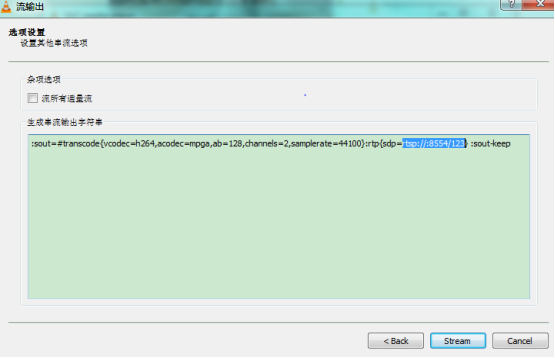

6.在proxyServer目录下，Run：./live555ProxyServer rtsp://10.140.188.145:8554/123

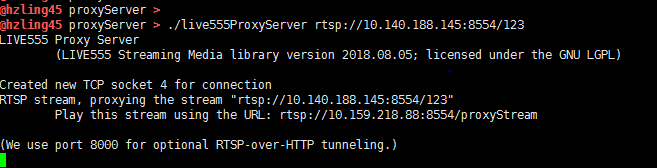

7.VLC Media Player:“媒体”->”打开网络串流”->“请输入网络URL”<br/>
rtsp://10.159.218.88:8554/proxyStream


## testProgs

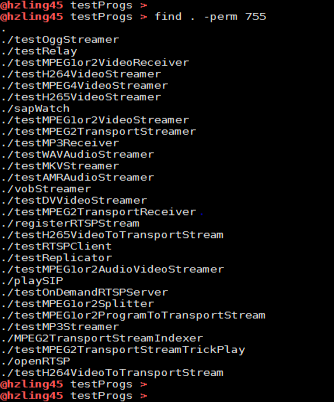

## Support

FAQ: http://www.live555.com/liveMedia/faq.html<br/>
Email: live-devel@lists.live555.com(http://lists.live555.com/mailman/listinfo/live-devel/)